In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
print("Imported")


%matplotlib inline 

Imported


In [62]:
df  = pd.read_csv("C:\\Bhavani Career\\Bhavani DataScientist\\ML\\05. Linear Regression - 3-20210717T155108Z-001\\05. Linear Regression - 3\\insurance.csv")
print("Data Read")

Data Read


In [63]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
#Expense Based on BMI

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.duplicated().sum()

0

In [67]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [68]:
df = df.drop(columns = "sex")

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


<AxesSubplot:>

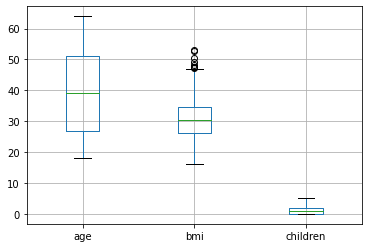

In [70]:
df.drop(columns = "expenses").boxplot()

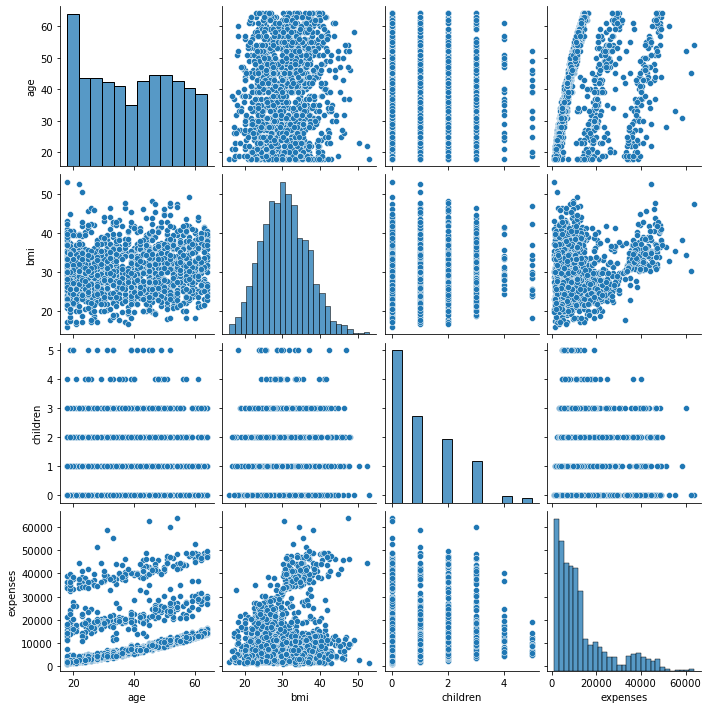

In [21]:
sns.pairplot(df)

In [71]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


<AxesSubplot:>

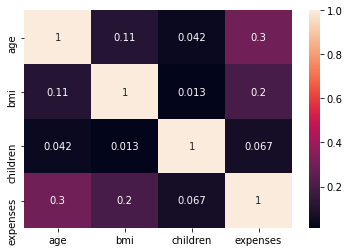

In [72]:
sns.heatmap(df.corr(), annot=True)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print("Imported")

Imported


In [74]:
X = df.drop(columns="expenses")
X = df.drop(columns="region")
X = df.drop(columns="smoker")
X.info

<bound method DataFrame.info of       age   bmi  children     region  expenses
0      19  27.9         0  southwest  16884.92
1      18  33.8         1  southeast   1725.55
2      28  33.0         3  southeast   4449.46
3      33  22.7         0  northwest  21984.47
4      32  28.9         0  northwest   3866.86
...   ...   ...       ...        ...       ...
1333   50  31.0         3  northwest  10600.55
1334   18  31.9         0  northeast   2205.98
1335   18  36.9         0  southeast   1629.83
1336   21  25.8         0  southwest   2007.95
1337   61  29.1         0  northwest  29141.36

[1337 rows x 5 columns]>

In [80]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                         for i in range(len(X.columns))]
  
print(vif_data)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [75]:
X = df.drop(columns="expenses")


In [76]:
y = df["expenses"]

In [77]:
model = LinearRegression()

In [81]:
model.fit(X,y)

ValueError: could not convert string to float: 'yes'